# FIFA 2019

Problem : The sole purpose of the project is to predict the overall rating of player using regression technique, it is interesting
    to know on which factors the rating of players signficantly depend and how machine learnnig can assist to rate the player which later
    can be used laer for bidding , estimating performance of player in the upcoming season etc. 

### Data set details
The data set contains 85 columns, it is obtained from the kaggle and the link of website is mentioned below:

The target columns is overall (rating of player from 0 to 100), the independent columns are like name, age, club, skills, Dribbling, Aggression, GK Skills , potential, wage, field position of player etc. 

'https://www.kaggle.com/karangadiya/fifa19'

In [416]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading file

In [417]:
df = pd.read_csv('data.csv', parse_dates = ['Contract Valid Until']) # updating contract as date data type
df = df.sample(frac = 1, random_state = 4).reset_index(drop = True) # shuffling the data for randomness
df = df.drop(['Unnamed: 0', 'Photo', 'Club Logo', 'Flag'], axis = 1)
df.head()

ID          Name  Age   Nationality  Overall  Potential         Club  \
0  208927  H. Sulaimani   41  Saudi Arabia       63         63    Ohod Club   
1  240111     Y. Nuxoll   20       Germany       55         67    SV Meppen   
2  244373  V. Buyalskyi   25       Ukraine       75         80  Dynamo Kyiv   
3  213368   L. Rougeaux   24        France       65         69  KV Kortrijk   
4  219106  F. Al Ansari   31        Kuwait       70         70   Al Faisaly   

   Value  Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0     €0   €3K     1842           Left                       1.0        3.0   
1  €140K   €1K     1174          Right                       1.0        2.0   
2  €8.5M   €1K     1888          Right                       1.0        4.0   
3  €575K   €3K     1548          Right                       1.0        3.0   
4  €1.2M  €13K     1760          Right                       1.0        3.0   

   Skill Moves       Work Rate Body Type Real Face Position  Jersey Number  \
0          3.0    High/ Medium      Lean        No       LB           24.0   
1          2.0  Medium/ Medium    Normal        No       CB           19.0   
2          3.0      High/ High      Lean        No      LDM           29.0   
3          2.0  Medium/ Medium    Normal        No       RB            6.0   
4          3.0  Medium/ Medium      Lean        No      LDM            4.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0  Jun 11, 2018         NaN           2019-01-01    5'8  154lbs  58+2  58+2   
1   Jul 1, 2017         NaN           2019-01-01    6'3  187lbs  35+2  35+2   
2   Jul 1, 2010         NaN           2023-01-01    5'7  134lbs  65+2  65+2   
3  Aug 31, 2016         NaN           2019-01-01    6'1  187lbs  51+2  51+2   
4   Jul 1, 2006         NaN           2023-01-01    6'5  161lbs  61+2  61+2   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  58+2  61+2  60+2  60+2  60+2  61+2  62+2  62+2  62+2  61+2  64+2  64+2   
1  35+2  31+2  31+2  31+2  31+2  31+2  30+2  30+2  30+2  32+2  32+2  32+2   
2  65+2  72+2  71+2  71+2  71+2  72+2  73+2  73+2  73+2  72+2  73+2  73+2   
3  51+2  50+2  49+2  49+2  49+2  50+2  48+2  48+2  48+2  53+2  53+2  53+2   
4  61+2  63+2  64+2  64+2  64+2  63+2  67+2  67+2  67+2  65+2  70+2  70+2   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  64+2  61+2  62+2  66+2  66+2  66+2  62+2  61+2  66+2  66+2  66+2  61+2   
1  32+2  32+2  41+2  42+2  42+2  42+2  41+2  44+2  53+2  53+2  53+2  44+2   
2  73+2  72+2  72+2  70+2  70+2  70+2  72+2  70+2  62+2  62+2  62+2  70+2   
3  53+2  53+2  63+2  62+2  62+2  62+2  63+2  63+2  65+2  65+2  65+2  63+2   
4  70+2  65+2  65+2  69+2  69+2  69+2  65+2  64+2  64+2  64+2  64+2  64+2   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      71.0       43.0             61.0          67.0     43.0       63.0   
1      23.0       23.0             54.0          28.0     26.0       29.0   
2      64.0       68.0             38.0          75.0     52.0       75.0   
3      64.0       42.0             60.0          55.0     42.0       44.0   
4      54.0       43.0             60.0          78.0     44.0       67.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   69.0        69.0         70.0         64.0          48.0         52.0   
1   29.0        29.0         25.0         33.0          55.0         44.0   
2   54.0        50.0         69.0         73.0          70.0         72.0   
3   27.0        36.0         59.0         55.0          55.0         63.0   
4   65.0        70.0         74.0         72.0          54.0         62.0   

   Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
0     67.0       63.0     68.0       65.0     69.0     49.0      72.0   
1     36.0       41.0     57.0       35.0     71.0     40.0      81.0   
2     86.0       76.0     88.0       66.0 

## Shape of data

In [418]:
df.shape # the data contains 18207 rows and 85 columns

(18207, 85)

# Data Cleaning

In [419]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  object        
 8   Wage                      18207 non-null  object        
 9   Special                   18207 non-null  int64         
 10  Preferred Foot            18159 non-null  object        
 11  International Reputation  18159 non-null  float64       
 12  Weak Foot         

In [420]:
print('Categorical columns')
df.select_dtypes(include = object).columns # categorical columns

Categorical columns


Index(['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined',
       'Loaned From', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF',
       'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
       'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Release Clause'],
      dtype='object')

In [421]:
print('Numerical Columns')
df.select_dtypes(exclude = object).columns # numerical attributes

Numerical Columns


Index(['ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Contract Valid Until', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

# Pre Processing

### Checking null values 

In [422]:
i=0 # postion  
n=len(df)
for col in df.columns:
  print(i,col,df[col].isnull().sum()/n*100)   # calculation the percentage of null value
  i=i+1    # from this loop we found Loan From = 95%

0 ID 0.0
1 Name 0.0
2 Age 0.0
3 Nationality 0.0
4 Overall 0.0
5 Potential 0.0
6 Club 1.323666721590597
7 Value 0.0
8 Wage 0.0
9 Special 0.0
10 Preferred Foot 0.26363486571099026
11 International Reputation 0.26363486571099026
12 Weak Foot 0.26363486571099026
13 Skill Moves 0.26363486571099026
14 Work Rate 0.26363486571099026
15 Body Type 0.26363486571099026
16 Real Face 0.26363486571099026
17 Position 0.32954358213873786
18 Jersey Number 0.32954358213873786
19 Joined 8.529686384357664
20 Loaned From 93.05761520294392
21 Contract Valid Until 1.5873015873015872
22 Height 0.26363486571099026
23 Weight 0.26363486571099026
24 LS 11.451639479321141
25 ST 11.451639479321141
26 RS 11.451639479321141
27 LW 11.451639479321141
28 LF 11.451639479321141
29 CF 11.451639479321141
30 RF 11.451639479321141
31 RW 11.451639479321141
32 LAM 11.451639479321141
33 CAM 11.451639479321141
34 RAM 11.451639479321141
35 LM 11.451639479321141
36 LCM 11.451639479321141
37 CM 11.451639479321141
38 RCM 11.4516394793

Interpration: The null vaues are present in the data

Loaned attributes contians more than 93% null values , so dropping the null columns in next cell


In [423]:
df.drop('Loaned From',axis=1,inplace=True) # as it contains 93% missing value, so we dropped it

In [424]:
df.drop('Jersey Number',axis=1,inplace =True) # dropping Jersey Number as it is not relevant to modeling

In [425]:
df1 = df.copy() # df1 can be used in visualization , making copy
df.drop(['ID',"Name"],axis=1,inplace =True) # dopping irrelevant columns as these are not relevant for modeling 

In [426]:
def take_num(string): # function to take the number from the string 
    string1 =str()
    for val in string:
        if val.isnumeric()==True:
            string1=string1+val
        elif val == '.':
            string1= string1+val
        else:
            continue
    return float(string1 )

In [427]:
take_num('159.34_lbs') # demo , function check 

159.34

In [428]:
from sklearn.impute import SimpleImputer # importing simple imputer to impute missing values

In [429]:
si = SimpleImputer(strategy="most_frequent") # updating weight with frequent string
df["Weight"]= si.fit_transform(df[['Weight']])

In [430]:
df['Weight']=df['Weight'].apply(take_num).astype(float) # taking numerical values from the string for weight atttibute

In [431]:
df['Weight'].isnull().sum() # sanityc check

0

In [432]:
df['Value'].apply(take_num).astype(float) # taking numerical values fromt the value using function on value attribute

0          0.0
1        140.0
2          8.5
3        575.0
4          1.2
5        160.0
6        575.0
7          3.2
8          1.1
9        170.0
10        80.0
11       725.0
12         1.1
13         2.0
14       300.0
15         3.3
16       230.0
17       525.0
18       170.0
19       550.0
20       550.0
21       900.0
22       525.0
23       325.0
24       500.0
25       170.0
26         4.8
27       450.0
28         1.2
29       250.0
30       725.0
31       140.0
32       950.0
33       180.0
34       425.0
35         7.0
36       325.0
37         1.6
38       375.0
39       675.0
40       975.0
41       350.0
42         4.3
43       450.0
44        90.0
45       270.0
46         8.0
47         2.5
48         1.8
49         4.0
50       700.0
51        28.5
52         4.0
53         2.8
54       600.0
55       350.0
56         2.1
57       850.0
58       825.0
59       925.0
60       100.0
61         1.5
62       325.0
63       675.0
64       800.0
65       500.0
66        

In [433]:
df["Value_M"]=df['Value'].apply(take_num).astype(float) # taking numercial values from the Value_M attributes

In [434]:
df["Wage_K"] = df['Wage'].apply(take_num).astype(float) # taking numerical values from the Wage_K

In [435]:
df["Value_M"].isnull().sum() # sanity check 

0

In [436]:
df["Wage_K"].isnull().sum() # sanity check

0

In [437]:
df['Release Clause'].isnull().sum() 

1564

In [438]:
from sklearn.impute import SimpleImputer

In [439]:
si = SimpleImputer(strategy = 'most_frequent')   # replacing null with simple imputer 
df['Release Clause'] = si.fit_transform(df[["Release Clause"]])

In [440]:
df['Release Clause'].isnull().sum() # sanity check to ensure there is no null values after replacement

0

In [441]:
df["Release_clause_M"] = df['Release Clause'].apply(take_num).astype(float) # taking numerical values from Release_clause

In [442]:
df[["Value_M","Wage_K","Release_clause_M"]].head() # sanity check 

Value_M  Wage_K  Release_clause_M
0      0.0     3.0               1.1
1    140.0     1.0             231.0
2      8.5     1.0              18.5
3    575.0     3.0             906.0
4      1.2    13.0               2.0

In [443]:
df.drop(['Value',"Wage",'Release Clause'],axis=1,inplace=True) # dropping columns as information has been extracted from it

In [444]:
df['Height'].isnull().sum()

48

In [445]:
si = SimpleImputer(strategy = 'most_frequent') # imputing values
df['Height'] = si.fit_transform(df[["Height"]])

In [446]:
df['Height'].isnull().sum() # sanity check 

0

In [447]:
def height_cal(h): # function to calculate height into inches
    return int(h[0])*12+int(h[2])
height_cal("5'8")

68

In [448]:
df["Height"]=df['Height'].apply(height_cal) # converting height from feet to inches 

In [449]:
def field_cal(score): # calculating score for different field position 
    if int(score[:2])+int(score[-1])<100:
        return int(score[:2])+int(score[-1])
    else:
        return int(score[:2])

In [450]:
df.iloc[:,18:44].head(4)

LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM  \
0  58+2  58+2  58+2  61+2  60+2  60+2  60+2  61+2  62+2  62+2  62+2  61+2   
1  35+2  35+2  35+2  31+2  31+2  31+2  31+2  31+2  30+2  30+2  30+2  32+2   
2  65+2  65+2  65+2  72+2  71+2  71+2  71+2  72+2  73+2  73+2  73+2  72+2   
3  51+2  51+2  51+2  50+2  49+2  49+2  49+2  50+2  48+2  48+2  48+2  53+2   

    LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB  \
0  64+2  64+2  64+2  61+2  62+2  66+2  66+2  66+2  62+2  61+2  66+2  66+2   
1  32+2  32+2  32+2  32+2  41+2  42+2  42+2  42+2  41+2  44+2  53+2  53+2   
2  73+2  73+2  73+2  72+2  72+2  70+2  70+2  70+2  72+2  70+2  62+2  62+2   
3  53+2  53+2  53+2  53+2  63+2  62+2  62+2  62+2  63+2  63+2  65+2  65+2   

    RCB    RB  
0  66+2  61+2  
1  53+2  44+2  
2  62+2  70+2  
3  65+2  63+2

In [451]:
si = SimpleImputer(strategy='most_frequent') # columns from field
for col in df.iloc[:,18:44].columns:
    df[col] = si.fit_transform(df[[col]])

In [452]:
for col in df.iloc[:,18:43].columns:
    df[col] = df[col].apply(field_cal) # cleaning all field columns

In [453]:
df.iloc[:,18:43].head() # after cleaning 

LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  \
0  60  60  60  63  62  62  62  63   64   64   64  63   66  66   66  63   64   
1  37  37  37  33  33  33  33  33   32   32   32  34   34  34   34  34   43   
2  67  67  67  74  73  73  73  74   75   75   75  74   75  75   75  74   74   
3  53  53  53  52  51  51  51  52   50   50   50  55   55  55   55  55   65   
4  63  63  63  65  66  66  66  65   69   69   69  67   72  72   72  67   67   

   LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  
0   68   68   68   64  63   68  68   68  
1   44   44   44   43  46   55  55   55  
2   72   72   72   74  72   64  64   64  
3   64   64   64   65  65   67  67   67  
4   71   71   71   67  66   66  66   66

In [454]:
df['RB'] = df['RB'].apply(field_cal) # cleaning RB attribute

In [455]:
df.drop("Contract Valid Until",axis=1,inplace =True) # dropping contract columns 

In [456]:
df['Joined'] =pd.to_datetime(df['Joined']) # convertingg joined from string to date

In [457]:
df['Experience'] = 2019 -df['Joined'].dt.year # creating experience column by using joining date 

In [458]:
df.drop('Joined',axis=1,inplace=True) # dropping joining as we are using experience for our analysis
df['Experience'].head(4)

0    1.0
1    2.0
2    9.0
3    3.0
Name: Experience, dtype: float64

In [459]:
from sklearn.impute import  SimpleImputer

In [460]:
num_cols = list(df.select_dtypes(exclude = 'object').columns) # numerical columns
print('Numerical Columns:', num_cols)
print('Number of numerical columns:',len(num_cols))

Numerical Columns: ['Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Value_M', 'Wage_K', 'Release_clause_M', 'Experience']
Number of numerical columns: 73


In [461]:
cat_cols = list(df.select_dtypes(include = 'object').columns) # categorical columns
print('Categorical Columns:', cat_cols)
print('Number of categorica columns:',len(cat_cols))

Categorical Columns: ['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position']
Number of categorica columns: 7


### category columns imputations

In [462]:
df = df.copy()
si = SimpleImputer(strategy = 'most_frequent') # imputing cat columns
df[cat_cols] = si.fit_transform(df[cat_cols])
df[cat_cols].isnull().sum() # sanity check

Nationality       0
Club              0
Preferred Foot    0
Work Rate         0
Body Type         0
Real Face         0
Position          0
dtype: int64

In [463]:
si = SimpleImputer(strategy = 'median') # replacing null values in numerical columns using median
df[num_cols] = si.fit_transform(df[num_cols])
df[num_cols].isnull().sum()

Age                         0
Overall                     0
Potential                   0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW                          0
LAM                         0
CAM                         0
RAM                         0
LM                          0
LCM                         0
CM                          0
RCM                         0
RM                          0
LWB                         0
LDM                         0
CDM                         0
RDM                         0
RWB                         0
LB                          0
LCB                         0
CB                          0
RCB       

### Checking duplicated values

In [464]:
df.duplicated().isnull().sum()

0

There is no duplicated rows in the data

# EDA

## Target (Overall)

C:\Users\rishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


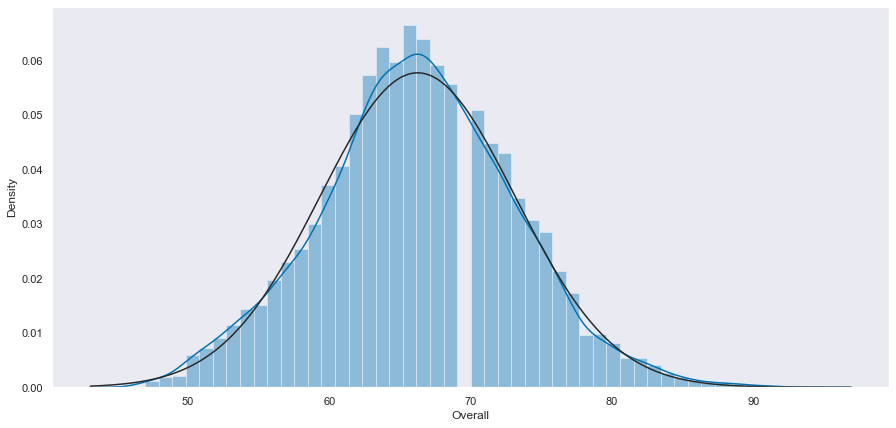

In [465]:
from scipy import stats
from scipy.stats import norm 
norm.fit(df['Overall'])
sns.distplot(df['Overall'],fit=norm)
plt.show()

In [466]:
target = df['Overall'].sample(frac= 0.1)
print('p value',stats.shapiro(target)[1])
# normality test
# null hypothesis : data is not normal
# alternate hypothesis : data is normal

p value 6.2321250879904255e-06



Intepretation:
from shapiro test it is clear that p values is less than 0.5 (level of signifigance), so fail to reject null hypothesis,
it shows that data is not normally distributed

However, from the graph it is obsereved that the target column overide the normal curve, it seema that the distribution is not normal



## Number of players having different age

C:\Users\rishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


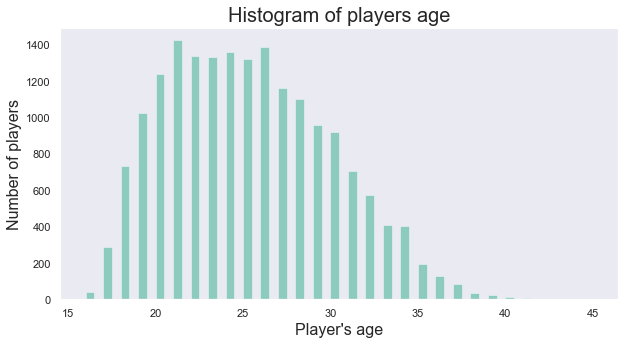

In [467]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Age
plt.figure(figsize=(10,5))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

Above graph shows that maximum player age lies between 20 to 30

After 35 age players hardly play, it might be due to retirement

The youngest player may have age around 17 or 18 while the eldest one is around 40

## Count of players on the position

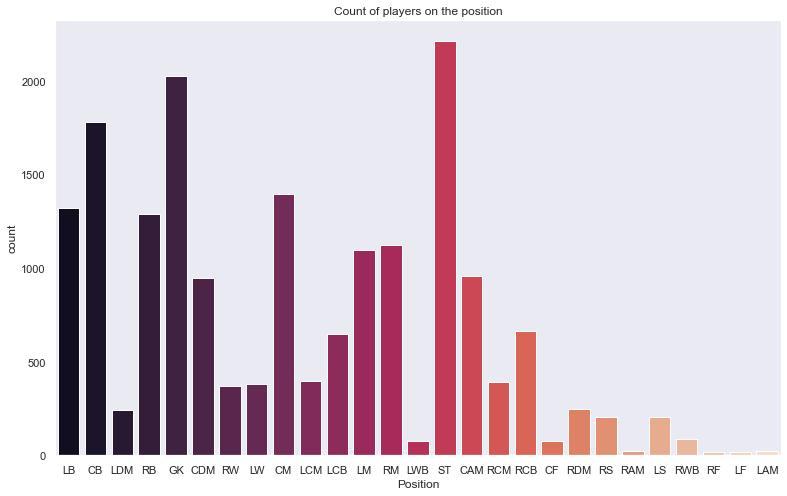

In [468]:
plt.figure(figsize = (13,8))
ax = sns.countplot(x = 'Position', data = df, palette = 'rocket')
ax.set_title(label='Count of players on the position')
plt.show()

Above barplot shows that most players play in the position ST, CM GK, RB, CB, LB while few players are there for the position
LWB, LDM , CF, RAM, RF LF, LAM

It means new player likely to face competition for the field position  ST, CM GK, RB, CB while there is less competition to become part of club if player is interested in  the position LWB, LDM , CF, RAM, RF< LF, LAM

# Categorical vs Continuous

## Distribution of Age in various clubs

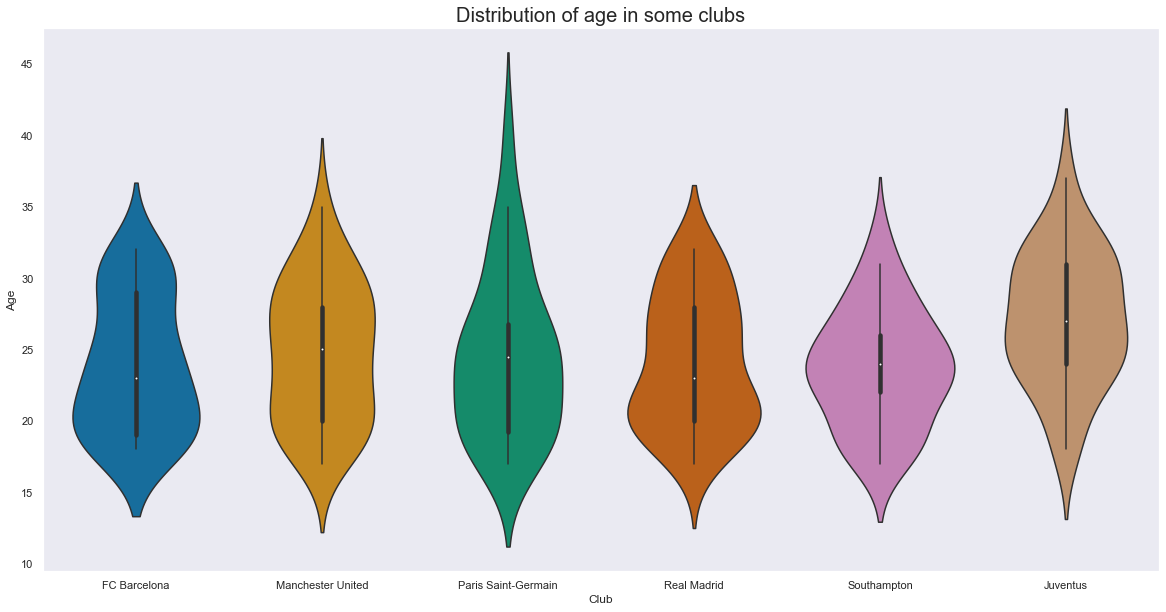

In [469]:
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Southampton', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.violinplot(x="Club", y="Age", data=df_club);
ax.set_title(label='Distribution of age in some clubs', fontsize=20);

There are 651 total clubs in the dataset, However six popular club are selected for the distribution of age. 

From the viloin plot it is clear that the distribution of age is almost similar for all club but the Paris Saint Germain club have more variation in age for it's player. 

The median age of Juventus club is high as compare to other five clubs

# Distribution of Shot Power with Preferred Foot

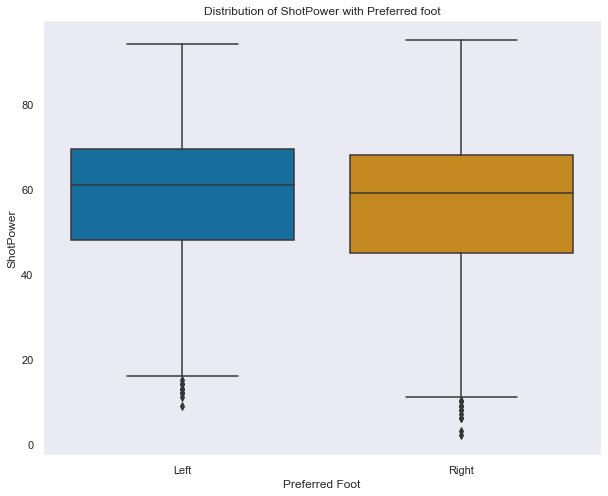

In [470]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Preferred Foot', y = 'ShotPower', data = df)
plt.title('Distribution of ShotPower with Preferred foot')
plt.show()

There is slight difference in the shot power, the left foot player are likely to posses little bit higher shot power compare 
to right foot player

# The Perfromance of BallControl and Dribbling with Preferred Foot

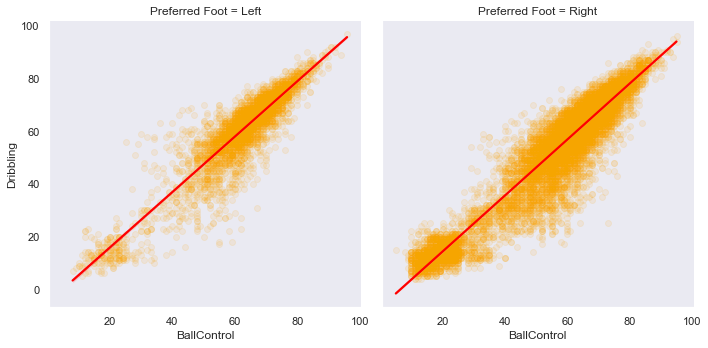

In [471]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df1,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})
plt.show()

Ball control and Dribbling skill are linearly related and depend on each other, however exceptions are also there

Form above it is clear that left foot player is most likely to have less variation compare to right foot player, in other words
the left foot player if good in ball control they are more likely to be good with dribbling, however this variation for right foot player is high

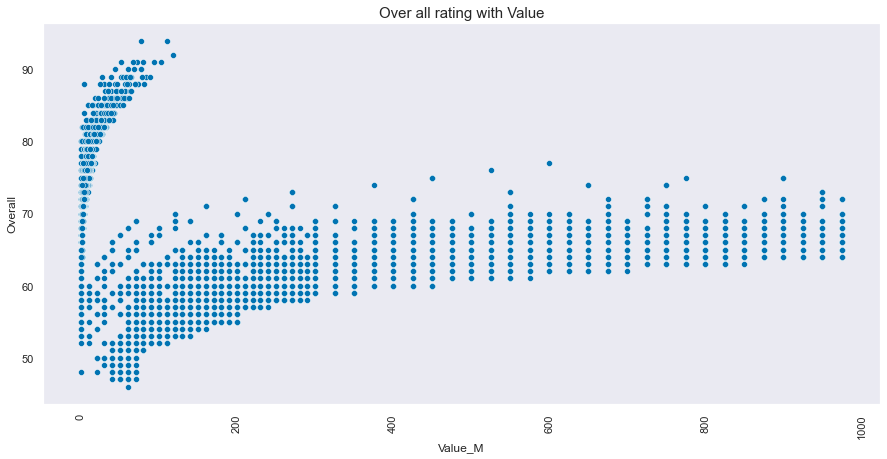

In [472]:
plt.rcParams['figure.figsize'] = 15,7
sns.scatterplot( y = df['Overall'], x =df['Value_M'], data = df)
plt.title("Over all rating with Value", fontdict= {'size':15})
plt.xticks(rotation = 90)
plt.show()

The overall rating of player generally increases with value, it saturates after some values


There is also one upper left part of plot shows that there exixts player whose value is less than 100 but overall rating is very high, such player definitely contibutes very much for the profit of club

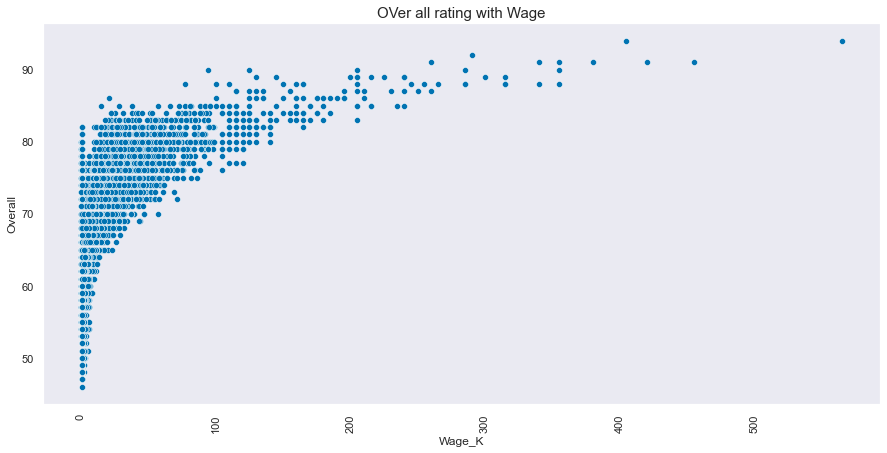

In [473]:
plt.rcParams['figure.figsize'] = 15,7
sns.scatterplot( y = df['Overall'], x =df['Wage_K'], data = df)
plt.title("OVer all rating with Wage", fontdict= {'size':15})
plt.xticks(rotation = 90)
plt.show()

The plot shows there exists direct relationship with wages and overall rating

However, the overall rating does not increase signifigantly after increase in wage beyond optimum level 


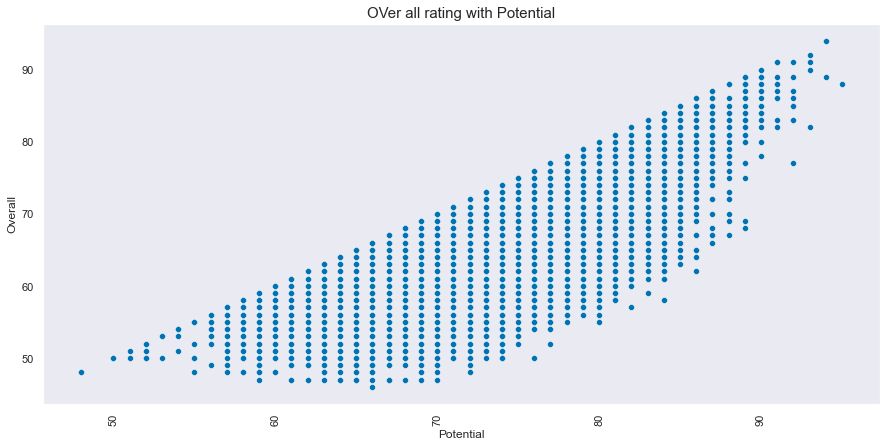

In [474]:
plt.rcParams['figure.figsize'] = 15,7
sns.scatterplot( y = df['Overall'], x =df['Potential'], data = df)
plt.title("OVer all rating with Potential",fontdict= {'size':15})
plt.xticks(rotation = 90)
plt.show()

The plot shows high potential leads to increase over all rating of player, but it is not always true there are
some player whose potential is same but far difference is there in the rating. 

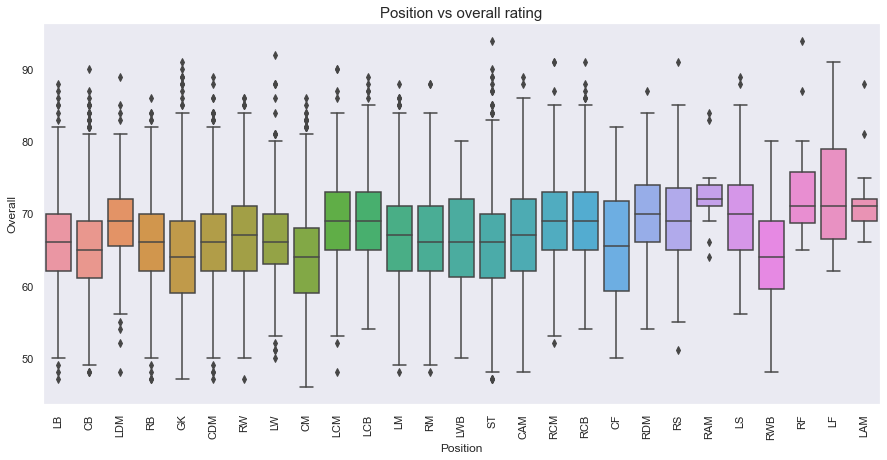

In [476]:
sns.boxplot(x = df1['Position'], y = df1['Overall'])
plt.title("Position vs overall rating", fontdict= {'size':15})
plt.xticks(rotation = 90)
plt.show()

Above box plot shows that that the median rating for LCM , LCB , RAM postion is slightly  higher compare to other position

The outliers are also present in most of the position which make it hard to estimate the rating base on position

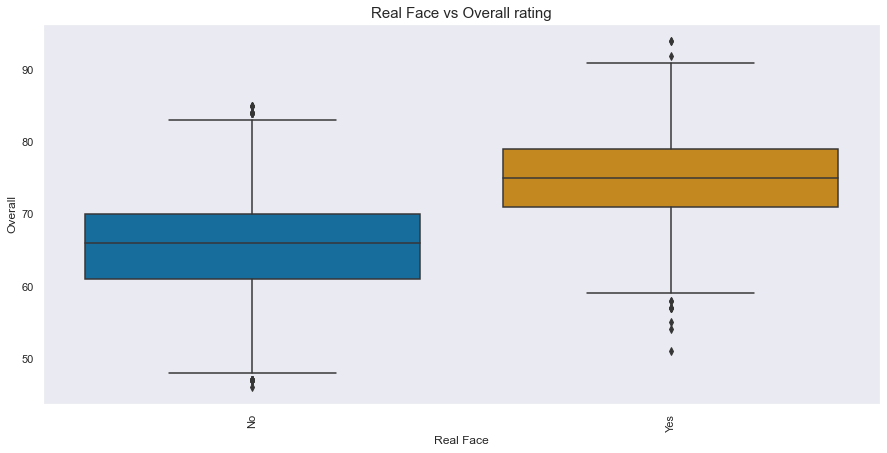

In [479]:
sns.boxplot(x = df1['Real Face'], y = df1['Overall'])
plt.title('Real Face vs Overall rating', fontdict= {'size':15})
plt.xticks(rotation = 90)
plt.show()

The boxplot shows that the real face median rating is higher compare to no real face but the outliers are there in both

<Figure size 2880x2880 with 0 Axes>

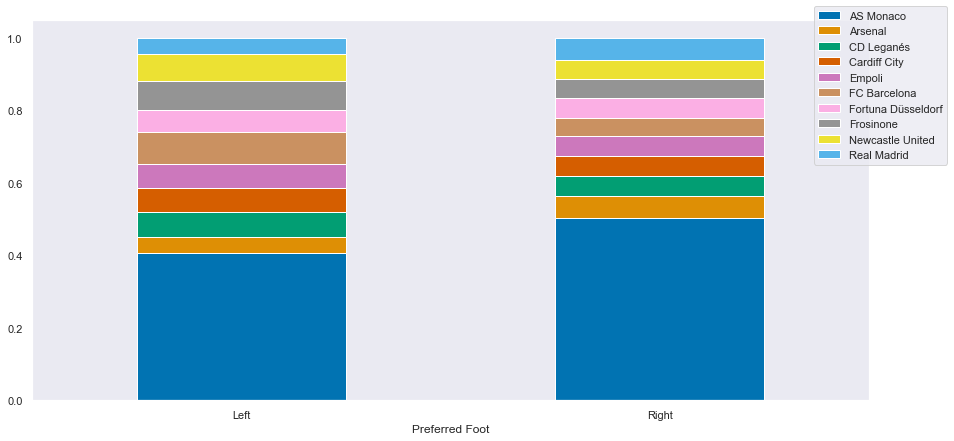

In [480]:
a=df['Club'].value_counts().head(10).index.tolist()
a
df_club = df.loc[df['Club'].isin(a) & df['Preferred Foot']]
tr=pd.crosstab(df_club['Preferred Foot'],df_club['Club'],normalize=0)
plt.figure(figsize = (40,40))
tr.plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.show()


The graph compare the count of left and right foot player for some clubs

It makes clear that in Real Madrid the right foot player are more in number, same case is with Arsenal and AS Monaco


Opposite case exits for Cardiff City,| FC Barcelona and Fosinone

## Relation dribbling and crossing with respected finishing of players

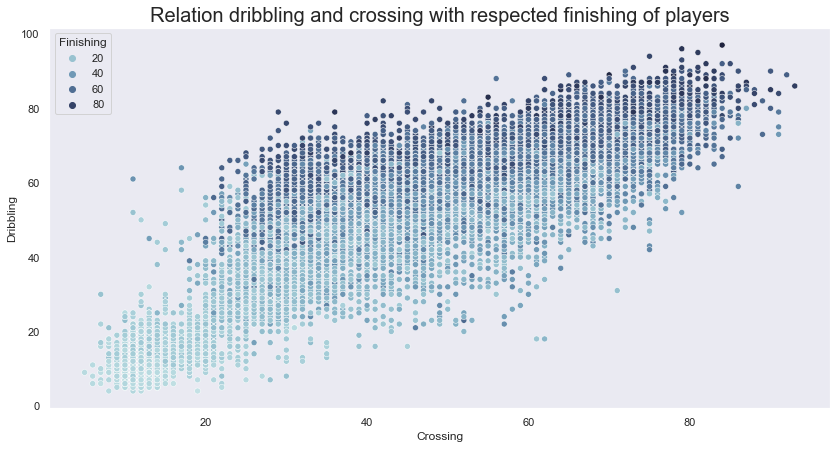

In [481]:
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Crossing', y='Dribbling',
                     hue='Finishing',
                     palette=cmap, sizes=(1, 1),
                     data=df)
ax.set_title(label='Relation dribbling and crossing with respected finishing of players', fontsize=20);

Dribbling and Crossing skill are highly correlated

## Relation stamina and age with respected sprint speed of players'

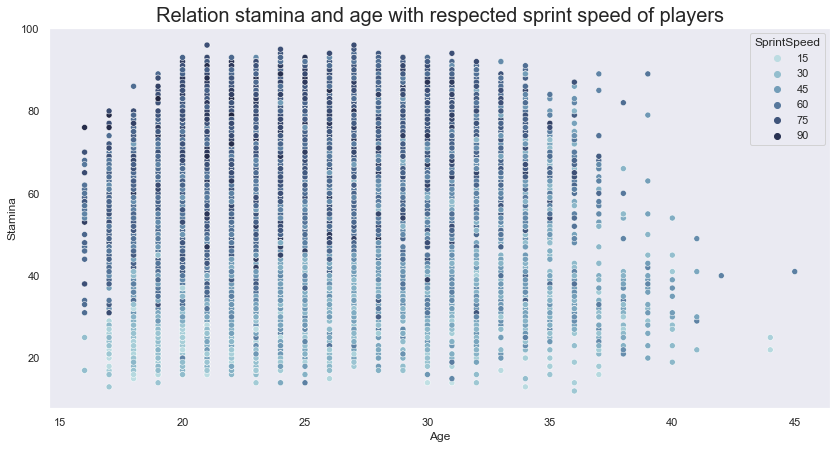

In [482]:
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Age', y='Stamina',
                     hue='SprintSpeed',
                     palette=cmap, sizes=(1, 1),
                     data=df)
ax.set_title(label='Relation stamina and age with respected sprint speed of players', fontsize=20);

There is no specific relation between age stamina

It can be said from graph that after age 35 the stamina start decaying

# Correlation

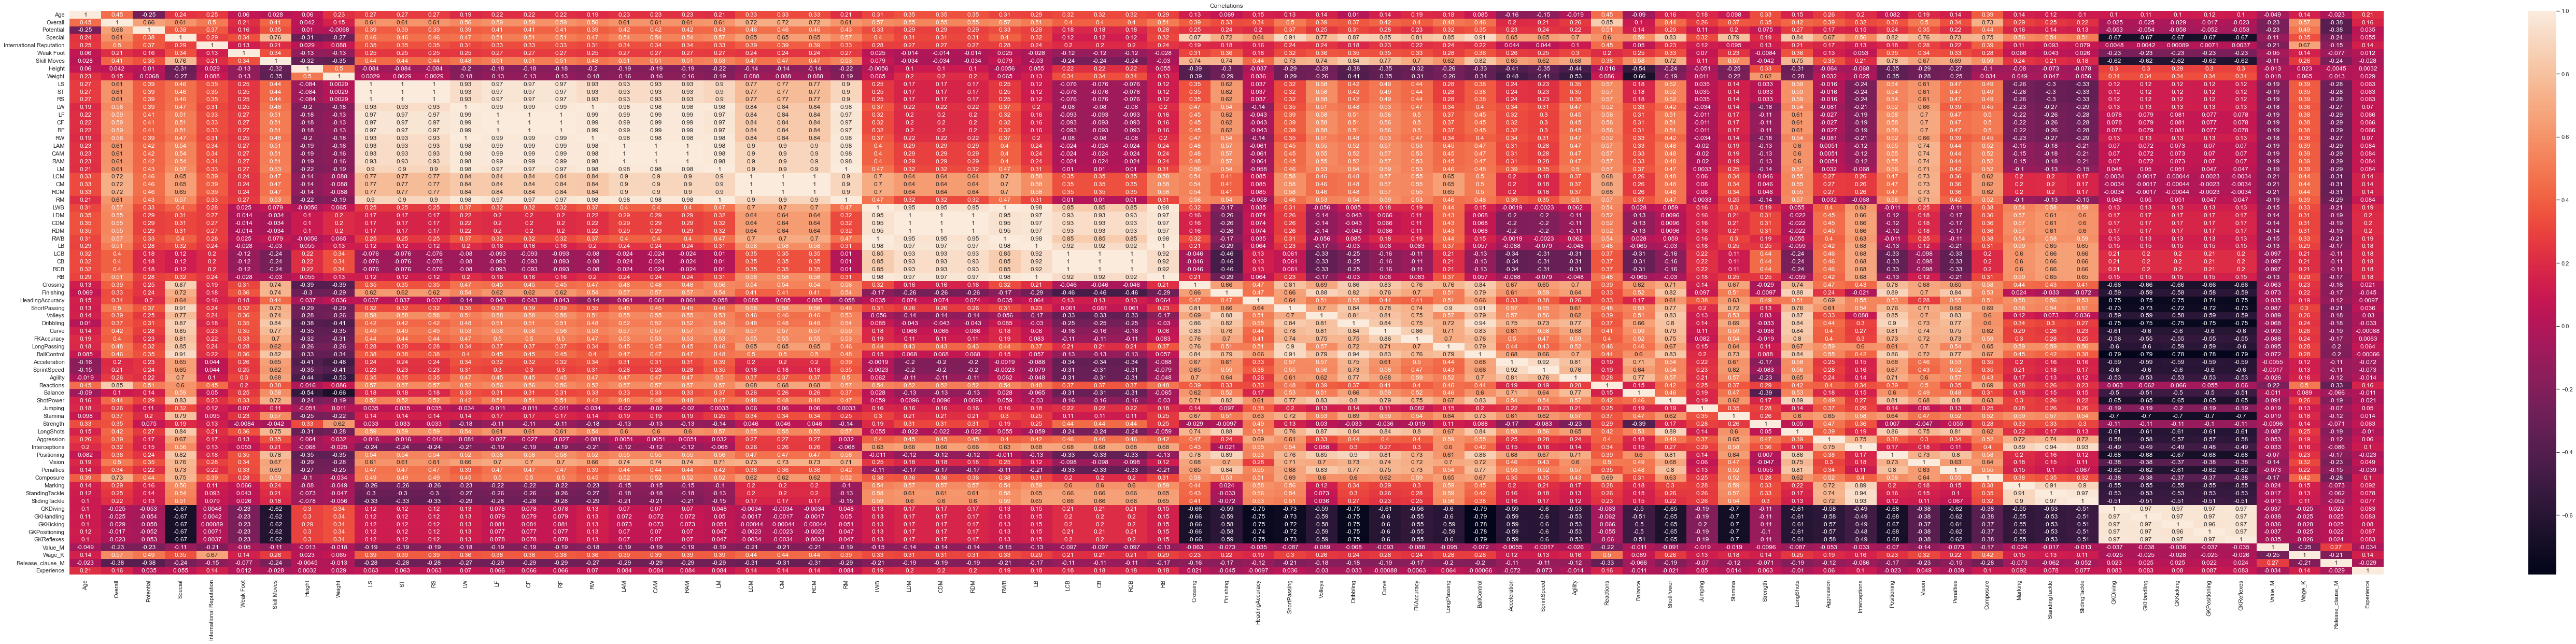

In [483]:
plt.figure(figsize = (100,20))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations')
plt.show()

From above heatmap it is clear that high multicollinearity exits 

There are independent variable which are highly correlated with the target variable which good for model example
Potential, Special, International Reputation, Field position LS are moderately correlated with target variable


There are dependent variables which are highly corrleated with each other and can incrase multicollinearity in the data
which is not good for the modeling example
GK diving , GK handling is correlated with skill moves

# Stats Models

In [484]:
df[cat_cols].nunique()

Nationality       164
Club              651
Preferred Foot      2
Work Rate           9
Body Type          10
Real Face           2
Position           27
dtype: int64

In [485]:
df = pd.get_dummies(data=df,columns=['Preferred Foot','Real Face'],drop_first=True) # dummy
# creating dummy of Real Face and Preferred Foot as number of unique value cateogries are only few

In [486]:
from sklearn.preprocessing import LabelEncoder # importing label encoder

There are categorical variable whose subcatagories are more than hundred so using label encoding instead of one hot encoder

In [487]:
df_carbon= df.copy()
label = LabelEncoder()
df['encoded_nationality']=label.fit_transform(df['Nationality'])

In [488]:
df['encoding_club']=label.fit_transform(df['Club'])

In [489]:
df['encoding_body_type'] =label.fit_transform(df['Body Type'])

In [490]:
df['encoding_Position'] =label.fit_transform(df['Position'])

In [491]:
df['encoding_work_rate'] =label.fit_transform(df['Work Rate'])

In [492]:
df.drop(['Nationality','Club',"Work Rate","Body Type",'Position'],axis= 1,inplace=True)

# Modelling 

### Linear regression

In [493]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [494]:
y=df['Overall'] 
X =df.drop("Overall",axis=1)

X_train, X_test, y_train, y_test = train_test_split(    X, y, test_size=0.15, random_state=42)

In [495]:
# shape of train and test data
print("X train's shape", X_train.shape)
print("X test's shape", X_test.shape)
print("y train's shape", y_train.shape)
print("y test's shape", y_test.shape)

X train's shape (15475, 79)
X test's shape (2732, 79)
y train's shape (15475,)
y test's shape (2732,)


In [496]:
df.shape

(18207, 80)

In [497]:
import statsmodels.api as sm

### Base model

In [498]:

X_trainc = sm.add_constant(X_train) # adding constant to model 
model1 = sm.OLS(y_train,X_trainc).fit() # fitting model with training data 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3317.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:45:12   Log-Likelihood:                -31141.
No. Observations:               15475   AIC:                         6.241e+04
Df Residuals:                   15411   BIC:                         6.290e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -13.8263      0.475    -29.123      0.000     -14.757     -12.896
Age                          0.4932      0.006     84.107      0.000       0.482       0.505
Potential                    0.4775      0.005    104.021      0.000       0.468       0.486
Special                      0.0098      0.002      5.738      0.000       0.006       0.013
International Reputation    -0.2040      0.054     -3.776      0.000      -0.310      -0.098
Weak Foot                    0.0203      0.024      0.832      0.405      -0.027       0.068
Skill Moves                  0.8240      0.039     20.883      0.000       0.747       0.901
Height                       0.0233      0.003      6.808      0.000       0.017       0.030
Weight                       0.0073      0.002      4.556      0.000       0.004       0.010
LS                           0.0278      0.011      2.541      0.011       0.006       0.049
ST                           0.0278      0.011      2.541      0.011       0.006       0.049
RS                           0.0278      0.011      2.541      0.011       0.006       0.049
LW                          -0.0422      0.022     -1.960      0.050      -0.084    1.41e-06
LF                          -0.0460      0.015     -3.133      0.002      -0.075      -0.017
CF                          -0.0460      0.015     -3.133      0.002      -0.075      -0.017
RF                          -0.0460      0.015     -3.133      0.002      -0.075      -0.017
RW                          -0.0422      0.022     -1.960      0.050      -0.084    1.41e-06
LAM                         -0.0385      0.014     -2.746      0.006      -0.066      -0.011
CAM                         -0.0385      0.014     -2.746      0.006      -0.066      -0.011
RAM                         -0.0385      0.014     -2.746      0.006      -0.066      -0.011
LM                           0.0860      0.022      3.915      0.000       0.043       0.129
LCM                          0.0132      0.012      1.103      0.270      -0.010       0.037
CM                           0.0132      0.012      1.103      0.270      -0.010       0.037
RCM                          0.0132      0.012      1.103      0.270      -0.010       0.037
RM                           0.0860      0.022      3.915      0.000       0.043       0.129
LWB                          0.0481      0.021      2.288      0.022       0.007       0.089
LDM                          0.0415      0.013      3.203      0.001       0.016       0.067
CDM                          0.0415      0.013      3.203      0.001       0.016       0.067
RDM                          0.0415      0.013      3.203      0.001       0.016       0.067
RWB                          0.0481      0.021      2.288      0.022       0.007       0.089
LB            

Interpretation:
    
The R-squared value is 0.931 and the adjusted R squqre value is almost same which shows that least number of
insignificant variables are there in the model

The R - squreed value is 0.931 , it means 93% of variance in the target variable is explained by the model

Probability of F stat for the model is 0 (p value for the model's annova test is zero) which is less than significant level
(0.05), it conveys that model is significant

The Durbin watson value is almost 2 , it ensure that there is not auto correlation in the data


In [499]:
cols = list(X_trainc.columns)   # using backward elimination to remove least significant variables

while len(cols)>0:
    X1 = Xc[cols]
    model_temp = sm.OLS(y, X1).fit()
    p=model_temp.pvalues
    p= p.drop(labels=['const']) 
    pmax = max(p)                          
    feature_pmax = p.idxmax() 
    if (pmax>0.05):                        # condition to check lease significant variables
        cols.remove(feature_pmax)          # removing feature with highest p value and having p value greater than 0.05
        print(feature_pmax,pmax)
    else:
        break
        
selected_cols=cols
print(selected_cols)

RB 0.9897758057197545
LB 0.9897758057196407
ShotPower 0.8991187102015283
Agility 0.5578505749830731
Dribbling 0.6371792511334177
Weak Foot 0.46042169778474307
Stamina 0.3997331569574297
StandingTackle 0.17996020857213396
CM 0.13240125903300082
LCM 0.1324012590330031
RCM 0.13240125903302655
Value_M 0.12524989778966125
LongShots 0.12361946448844542
Marking 0.07991179069346835
encoding_club 0.05481225341655601
GKKicking 0.05172954225165406
['const', 'Age', 'Potential', 'Special', 'International Reputation', 'Skill Moves', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LCB', 'CB', 'RCB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'Balance', 'Jumping', 'Strength', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'SlidingTackle', 'GKDiving', 'GKHan

In [500]:
selected_cols.remove('const') # removing constant columns

In [501]:
print("The below list the show the significant variable that impacts the overall rating of the player")
print(selected_cols)

The below list the show the significant variable that impacts the overall rating of the player
['Age', 'Potential', 'Special', 'International Reputation', 'Skill Moves', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LCB', 'CB', 'RCB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'Balance', 'Jumping', 'Strength', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKPositioning', 'GKReflexes', 'Wage_K', 'Release_clause_M', 'Experience', 'Preferred Foot_Right', 'Real Face_Yes', 'encoded_nationality', 'encoding_body_type', 'encoding_Position', 'encoding_work_rate']


In [502]:
# runnning model with significat variables 

X_trains = X_train[selected_cols]
X_trainsc= sm.add_constant(X_trains) # adding constant with selected model
model2 = sm.OLS(y_train,X_trainsc).fit()   
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4178.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:45:15   Log-Likelihood:                -31149.
No. Observations:               15475   AIC:                         6.240e+04
Df Residuals:                   15424   BIC:                         6.279e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -13.7054      0.471    -29.126      0.000     -14.628     -12.783
Age                          0.4942      0.006     84.926      0.000       0.483       0.506
Potential                    0.4784      0.005    105.231      0.000       0.469       0.487
Special                      0.0101      0.001     13.457      0.000       0.009       0.012
International Reputation    -0.2042      0.054     -3.783      0.000      -0.310      -0.098
Skill Moves                  0.8245      0.039     21.008      0.000       0.748       0.901
Height                       0.0233      0.003      6.797      0.000       0.017       0.030
Weight                       0.0073      0.002      4.583      0.000       0.004       0.010
LS                           0.0226      0.008      2.949      0.003       0.008       0.038
ST                           0.0226      0.008      2.949      0.003       0.008       0.038
RS                           0.0226      0.008      2.949      0.003       0.008       0.038
LW                          -0.0521      0.018     -2.935      0.003      -0.087      -0.017
LF                          -0.0448      0.013     -3.341      0.001      -0.071      -0.019
CF                          -0.0448      0.013     -3.341      0.001      -0.071      -0.019
RF                          -0.0448      0.013     -3.341      0.001      -0.071      -0.019
RW                          -0.0521      0.018     -2.935      0.003      -0.087      -0.017
LAM                         -0.0346      0.011     -3.075      0.002      -0.057      -0.013
CAM                         -0.0346      0.011     -3.075      0.002      -0.057      -0.013
RAM                         -0.0346      0.011     -3.075      0.002      -0.057      -0.013
LM                           0.0947      0.017      5.504      0.000       0.061       0.128
RM                           0.0947      0.017      5.504      0.000       0.061       0.128
LWB                          0.0398      0.014      2.865      0.004       0.013       0.067
LDM                          0.0491      0.010      4.714      0.000       0.029       0.069
CDM                          0.0491      0.010      4.714      0.000       0.029       0.069
RDM                          0.0491      0.010      4.714      0.000       0.029       0.069
RWB                          0.0398      0.014      2.865      0.004       0.013       0.067
LCB                         -0.0358      0.007     -5.434      0.000      -0.049      -0.023
CB                          -0.0358      0.007     -5.434      0.000      -0.049      -0.023
RCB                         -0.0358      0.007     -5.434      0.000      -0.049      -0.023
Crossing                    -0.0191      0.004     -4.900      0.000      -0.027      -0.011
Finishing     

In [503]:
len(selected_cols) # earlier columns size was 85 now it is reduced to 63 

63

In [506]:
np.sqrt(model1.ess) # rmse for model 1 

829.1860235694342

In [507]:
np.sqrt(model2.ess) # rmse for model 2 

829.1562710533354

### comparing model 1 and 2 (where model 1 is base model)



1. the rmse for model 2 is 829.15 is slightly less than base model that is 829.18 while model 2 use only 63 attributes while 
model 1 use 84

2. F stats value for model 2 is high which increase the reliability of model 2

3. Model 2 aic value is less compare to model 1 which convey model 2 better than base model or model 1

# Testing the Assumptions

## Assumptions-1 Normality of Residuals

C:\Users\rishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


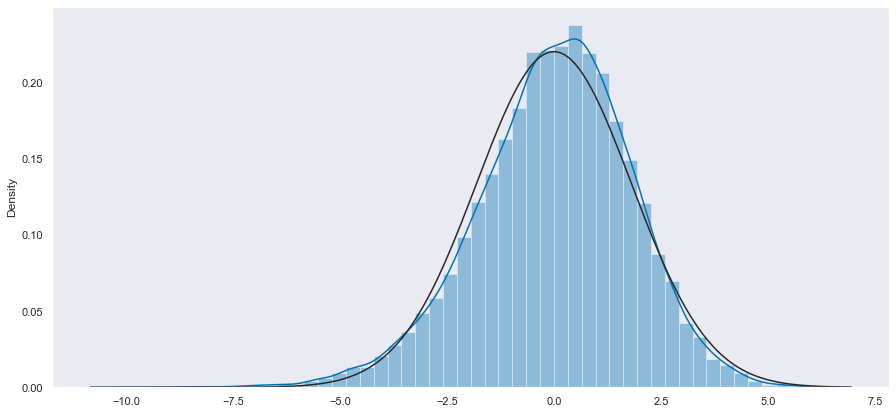

In [508]:
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals, fit = norm) # black line = std.
plt.show()

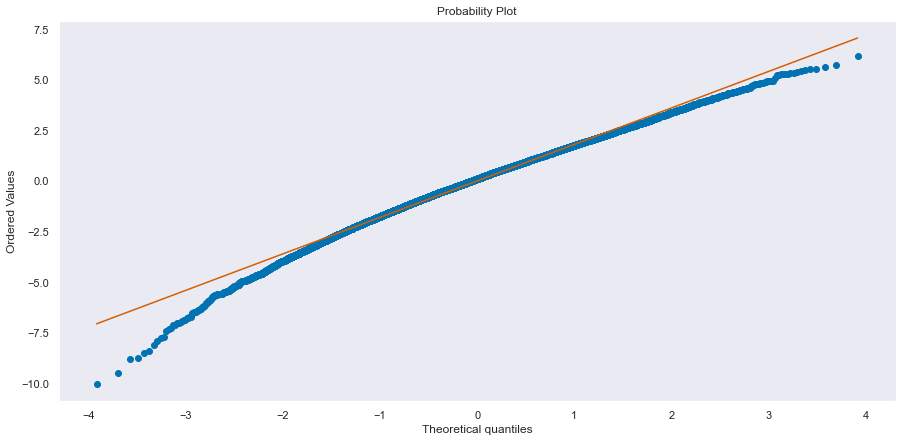

In [509]:
# Q-Q plot

import scipy.stats as st
st.probplot(residuals, plot = plt)
plt.show()

From above distplot  and qqplot it appears that the normality of residual is followed

## Assumption2- Multi collinearity

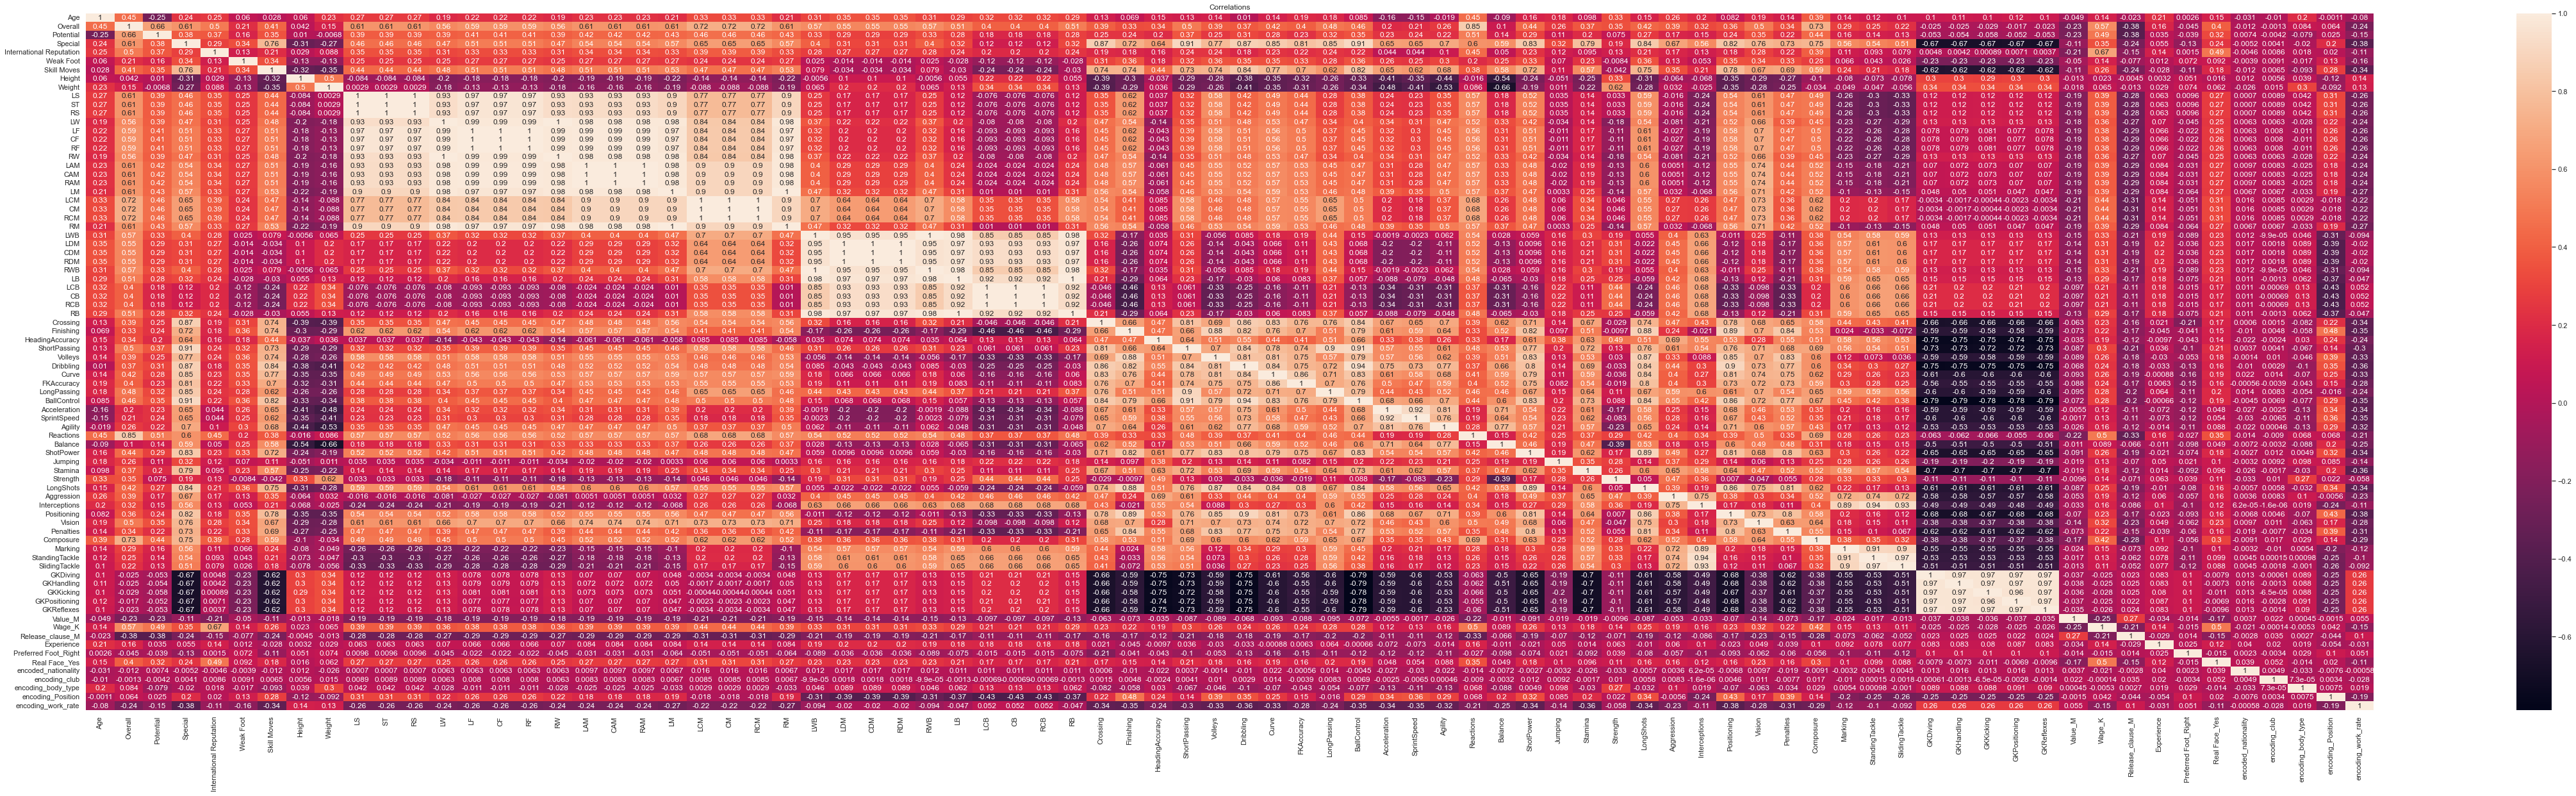

In [510]:
plt.figure(figsize = (80,20))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations')
plt.show()

In [511]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.set_option
vf = [vif(X_trains.values, i) for i in range(X_trains.shape[1])]
df_vif = pd.DataFrame(vf, index= X_trains.columns, columns=['vif'])



C:\Users\rishw\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [512]:
pd.set_option('display.max_rows', None)
df_vif.sort_values(by = 'vif', ascending= False)


vif
LWB                               inf
RWB                               inf
CDM                               inf
LDM                               inf
LCB                               inf
RM                                inf
LM                                inf
RAM                               inf
CAM                               inf
LAM                               inf
RW                                inf
RF                                inf
CF                                inf
LF                                inf
LW                                inf
RS                                inf
ST                                inf
LS                                inf
CB                                inf
RCB                               inf
RDM                               inf
Special                   6923.600911
Potential                  375.492194
BallControl                315.041177
ShortPassing               279.230082
Weight                     272.906299
Acceleration               225.529539
LongPassing                213.705465
Height                     209.591423
SprintSpeed                201.676233
Crossing                   200.955363
Reactions                  191.053249
HeadingAccuracy            172.154799
SlidingTackle              163.439729
Strength                   152.720090
Finishing                  151.541616
Interceptions              133.163713
Positioning                123.981116
Vision                     122.113226
Composure                   94.335567
Balance                     89.696261
Age                         87.644782
Aggression                  78.919211
Jumping                     69.949390
Curve                       65.129935
Penalties                   58.776849
Volleys                     58.684121
GKDiving                    55.434258
GKReflexes                  54.405439
GKHandling                  53.221071
GKPositioning               50.548009
Skill Moves                 44.460066
FKAccuracy                  43.088292
International Reputation    19.109469
encoding_body_type          11.985499
encoding_work_rate           6.318792
Preferred Foot_Right         4.780387
encoding_Position            4.757628
encoded_nationality          3.579114
Experience                   2.784186
Wage_K                       2.606033
Release_clause_M             1.795295
Real Face_Yes                1.600292

High vif score and heatmap correlation shows that multicollinearity exists

## Assumption-3 Constant variance of residuals(Homoscendasticity)

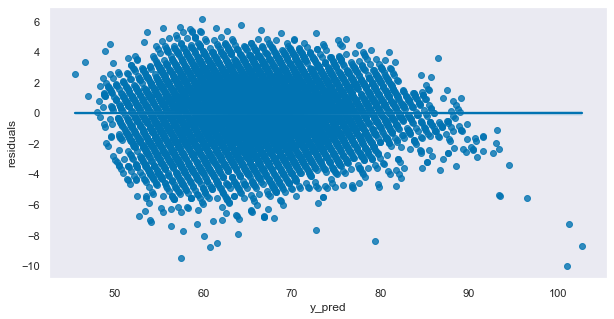

In [513]:
residuals=model2.resid
y_pred=model.predict(X_trainsc)
plt.figure(figsize=(10,5))
sns.regplot(x=y_pred,y=residuals)
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

In [514]:
import statsmodels.stats.api as sms

In [515]:
test=sms.het_goldfeldquandt(y=residuals,x=X_trainsc)
test

(0.9987898997231558, 0.5211644304956238, 'increasing')

## Assumption-4 Auto-correlation

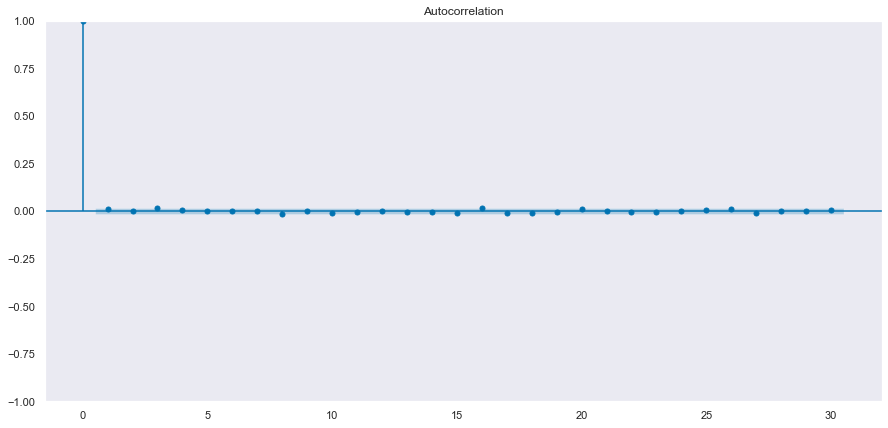

In [516]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(residuals,lags=30)
plt.show()

# Assumption -5 Linearity of Relationship

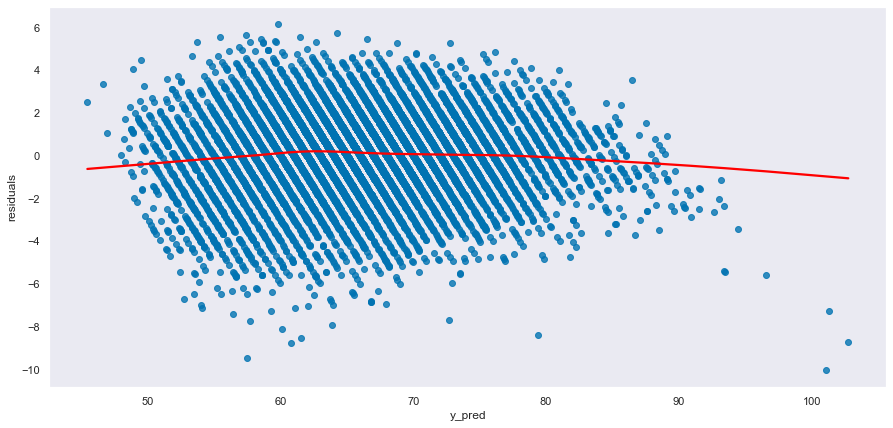

In [517]:
residuals=model2.resid


sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

In [518]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model2,frac=0.5)

(0.998053726914984, 0.5340937266158512)

# other models

In [412]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [533]:
X_trains = X_train[selected_cols]
X_tests = X_test[selected_cols]

### Linear regression

In [534]:
lir = LinearRegression()
lir.fit(X_trains, y_train)
print('r2 score for train ', lir.score(X_trains, y_train))
print('r2 score for test ', lir.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, lir.predict(X_tests))))

r2 score for train  0.9312480129311775
r2 score for test  0.9302893095118963
root means squared error 1.826524524317218


The r2 scoe is almost same for both train and test which shows that underfitting and overfitting is not there in the model

### Decision Tree Regression

In [536]:
from sklearn.tree import DecisionTreeRegressor

In [544]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_trains, y_train)
print("Decision Tree Regressor")
print('r2 score for train ',decision_tree.score(X_trains, y_train))
print('r2 score for test ', decision_tree.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, decision_tree.predict(X_tests))))

Decision Tree Regressor
r2 score for train  1.0
r2 score for test  0.9651388271014428
root means squared error 1.2916558430882024


Over fitting is there in the decision tree regression as the model is doing very well on the training but not so well on the test data 




### Dealing overfiiting with bagging  and random forest regressor

In [545]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [546]:
Bagging = BaggingRegressor() 
Bagging.fit(X_trains, y_train)

print("Bagging Regressor")
print('r2 score for train ', Bagging.score(X_trains, y_train))
print('r2 score for test ', Bagging.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, Bagging.predict(X_tests))))


Bagging Regressor
r2 score for train  0.9968485082830126
r2 score for test  0.985158379550318
root means squared error 0.8427843764121705


This model is better, performing well compare to linear regression, overfitting is reduced as compare to decision tree
and rmse value is also low

In [549]:
Random = RandomForestRegressor()
Random.fit(X_trains, y_train)

print("Random Forest Regressor")
print('r2 score for train ', Random.score(X_trains, y_train))
print('r2 score for test ', Random.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, Random.predict(X_tests))))


Random Forest Regressor
r2 score for train  0.998136668280655
r2 score for test  0.9875182622127806
root means squared error 0.772882266930657


The Random Forest regressor is doing well compare to any bagging , linear regression and decision tree

the rmse value is further reduced from 0.84 to 0.77

### Support vector Regressor

In [550]:
from sklearn.svm import SVR

In [551]:
Vector = SVR()
Vector.fit(X_trains, y_train)

print(" Vector Regressor")
print('r2 score for train ', Vector.score(X_trains, y_train))
print('r2 score for test ', Vector.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, Vector.predict(X_tests))))


 Vector Regressor
r2 score for train  0.8114889118949821
r2 score for test  0.8071828281653877
root means squared error 3.0377264996730124


The support vector regressor performance is not as  good as other regressor mentioned above

In [577]:
# Other ensemble mode 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

### Ada boost Regressor

In [586]:
Adda = AdaBoostRegressor()
Adda.fit(X_trains, y_train)

print("Adda boost Regressor")
print('r2 score for train ', Adda.score(X_trains, y_train))
print('r2 score for test ', Adda.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, Adda.predict(X_tests))))


Adda boost Regressor
r2 score for train  0.925683139659889
r2 score for test  0.9230372927797293
root means squared error 1.9191812123220051


### Gradient Regressor

In [587]:
Gradient = GradientBoostingRegressor()
Gradient.fit(X_trains, y_train)

print("Adda boost Regressor")
print('r2 score for train ', Gradient.score(X_trains, y_train))
print('r2 score for test ', Gradient.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, Gradient.predict(X_tests))))


Adda boost Regressor
r2 score for train  0.9734174135161653
r2 score for test  0.9714105311374733
root means squared error 1.1697117676473257


### XG boost

In [588]:
xg = XGBRegressor()
xg.fit(X_trains, y_train)

print("xg boost Regressor")
print('r2 score for train ', xg.score(X_trains, y_train))
print('r2 score for test ', xg.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, xg.predict(X_tests))))


xg boost Regressor
r2 score for train  0.9957416448262807
r2 score for test  0.9859790196079944
root means squared error 0.8191529629996319


Interpretation :
    
    From all models random forest regressor peformance best with 
    
    r2 score for train  0.998136668280655
    r2 score for test  0.9875182622127806
    root means squared error 0.772882266930657

### Tuning model best model (Random Forest)

In [603]:
list1 =list(np.logspace(-5,5 ,8)) + [0]
list1

[1e-05,
 0.0002682695795279727,
 0.0071968567300115215,
 0.19306977288832497,
 5.1794746792312125,
 138.9495494373139,
 3727.593720314938,
 100000.0,
 0]

In [606]:
from sklearn.model_selection import RandomizedSearchCV # importing random search cv


In [610]:
estimator = RandomForestRegressor()  # tuning model with randomized seachr cv , coarse search 

param = {'max_depth' : [2,4, 6,8, 10, None], 'min_samples_split' : [1,2,3,4,5,6,7,8,9],
        'ccp_alpha' : list1}

random = RandomizedSearchCV(estimator = estimator, param_distributions= param, cv = 3, verbose= 1, n_jobs = -2 ,
                           scoring = 'r2')
random.fit(np.array(X_trains), np.array( y_train))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'ccp_alpha': [1e-05,
                                                      0.0002682695795279727,
                                                      0.0071968567300115215,
                                                      0.19306977288832497,
                                                      5.1794746792312125,
                                                      138.9495494373139,
                                                      3727.593720314938,
                                                      100000.0, 0],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9]},
                   scoring='r2', verbose=1)

In [611]:
random.best_params_ # finding best params

{'min_samples_split': 9, 'max_depth': 10, 'ccp_alpha': 0}

In [620]:
estimator = RandomForestRegressor()  # tuning model with randomized seachr cv , coarse search 

param = {'max_depth' : [2,4, 6,8, 10,12,14,16,18,20, 22, 24, 26, 28, 30, 32 ,None], 'min_samples_split' : [1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15],
        'ccp_alpha' : list1, 'n_estimators':[100, 200, 300, 400, 500]}

random2 = RandomizedSearchCV(estimator = estimator, param_distributions= param, cv = 3, verbose= 1, n_jobs = -2 ,
                           scoring = 'r2')
random2.fit(np.array(X_trains), np.array( y_train))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'ccp_alpha': [1e-05,
                                                      0.0002682695795279727,
                                                      0.0071968567300115215,
                                                      0.19306977288832497,
                                                      5.1794746792312125,
                                                      138.9495494373139,
                                                      3727.593720314938,
                                                      100000.0, 0],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, 32, None],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                          

In [621]:
random2.best_params_

{'n_estimators': 200, 'min_samples_split': 13, 'max_depth': 24, 'ccp_alpha': 0}

In [622]:
Random = RandomForestRegressor(n_estimators=200, min_samples_split= 13, max_depth= 24, ccp_alpha= 0) # fine search
Random.fit(X_trains, y_train)

print("Random Forest Regressor")
print('r2 score for train ', Random.score(X_trains, y_train))
print('r2 score for test ', Random.score(X_tests, y_test))


print('root means squared error', np.sqrt(mean_squared_error(y_test, Random.predict(X_tests))))


Random Forest Regressor
r2 score for train  0.9953620036478756
r2 score for test  0.9867795832919246
root means squared error 0.7954234451566994


In [640]:
df_feature_importance = pd.DataFrame(Random.feature_importances_, index= X_trains.columns, columns = ['score'])
df_feature_importance = df_feature_importance.sort_values('score', ascending = False)

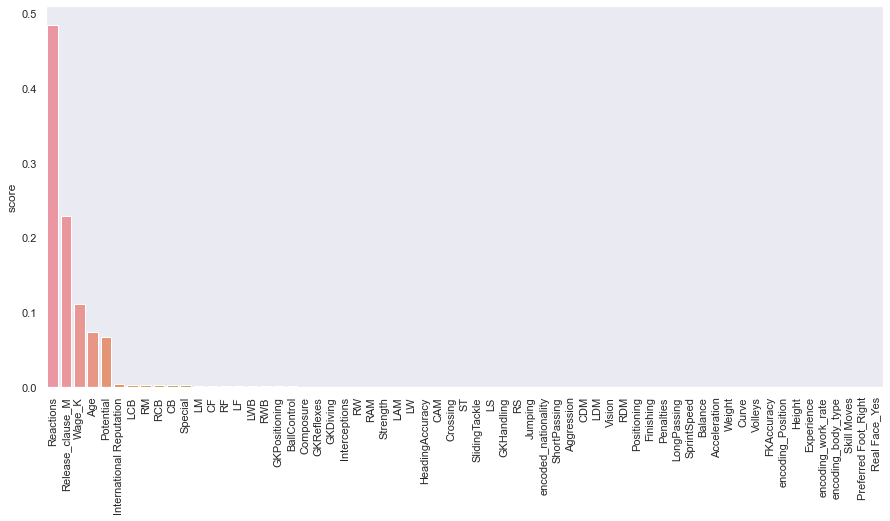

In [641]:
x_plot = np.array(df_feature_importanc.index)
sns.barplot(x = df_feature_importance.index, y = df_feature_importance['score'])
plt.xticks(rotation = 90)
plt.show()

The important feature for the random forest model are Reactions, Release_clause_M, Wage_K, Age, Potential

# Conclusion

	While plotting histogram of age we found a high number of players belonging to the age category of 20 to 28 and this trend decreased afterward. 
	

Count of players with field positions like goalkeeper , centre back and striker is very high but very less for right attacking midfielder and right forward.
	

The median shot power of the left preferred player is very high with no outlier on the minimum side. It indicates if the player is lefty, he is more likely to have high shot power. However, the right foot player has more control over the ball in comparison with the left foot player.
	

Potential of a player generally shows a decreasing trend with age after 30, it might be due to injuries or ageing factor.
	

The famous  club like 'Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United ect shows overall rating around 80 or above


It is interesting to know agility , dribbling skill, stamina, long shots, field position like LB,RB,LCM,CM and RCM etc are not significant for the overall rating of the player.


However, age, potential, aggression, interception, strength, wage, experience, etc came out as  significant variables for linear regression. We observed that the R square value of the model is 0.92943189 , which explains the good amount of variance present in the target variable. The difference in the R square value of test and train data was not significant, we conclude that the model does not need further treatment for the optimization. 


The model Random forest  fits well to the data in order to  estimate the overall rating, it explained variance of 98.677 % on test data and root mean square error is 0.7954, very less compare to other model like ada boost, linear regression, support 
vector regressor etc.

## Thank you